In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
apple = pd.read_csv('appl_1980_2014.csv')

In [5]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [11]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [15]:
apple = apple.set_index('Date')

In [17]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [19]:
duplicates = apple.index.duplicated().sum()
print(f"Number of duplicate dates: {duplicates}")

Number of duplicate dates: 0


In [21]:
apple = apple.sort_index()

In [23]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [27]:
last_business_day = apple.resample('BME').last()
last_business_day

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


In [31]:
days_difference = (apple.index[-1] - apple.index[0]).days
print(f"Difference in days: {days_difference}")

Difference in days: 12261


In [37]:
num_months = apple.index.to_period('M').nunique()
print(f"Number of months in the data: {num_months}")

Number of months in the data: 404


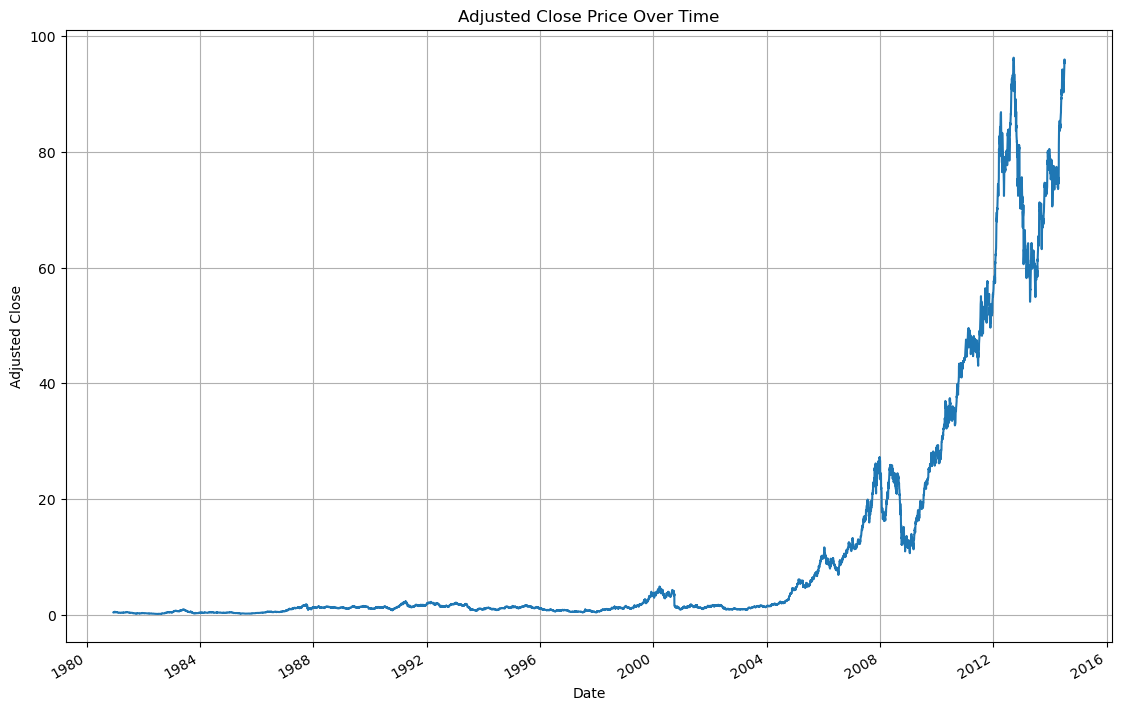

In [45]:
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot(title='Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.grid(True)
plt.show()

BoxPlot the 'Adj Close' value

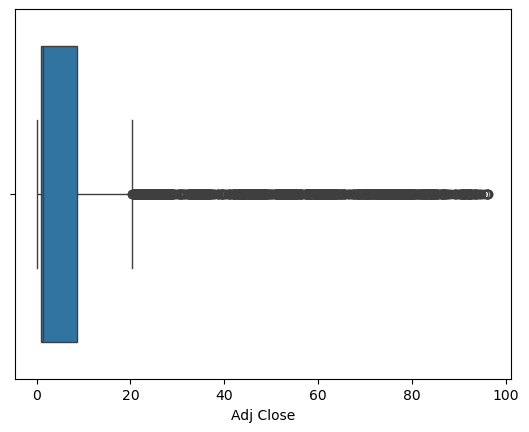

In [51]:
sns.boxplot(x=apple['Adj Close'])
plt.show()